In [1]:
%matplotlib inline
from astropy.io import ascii
import matplotlib.pyplot as plt; plt.ion()
import numpy as np
# from mavisim import AstromCalibSimE2E
from PrototypingRead import AstrocalibRead
from PrototypingSim import CreateDist
import pandas as pd
from scipy import interpolate

%reload_ext autoreload
%autoreload 2

# First, Let's look at what is a distortion

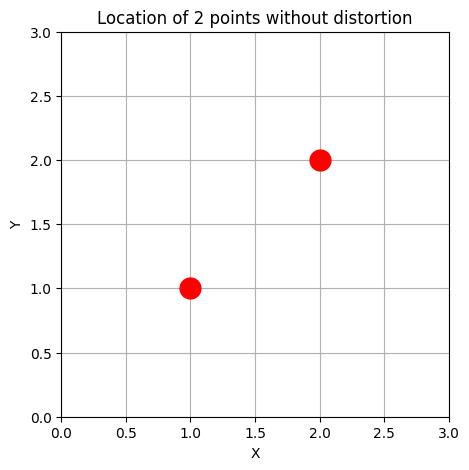

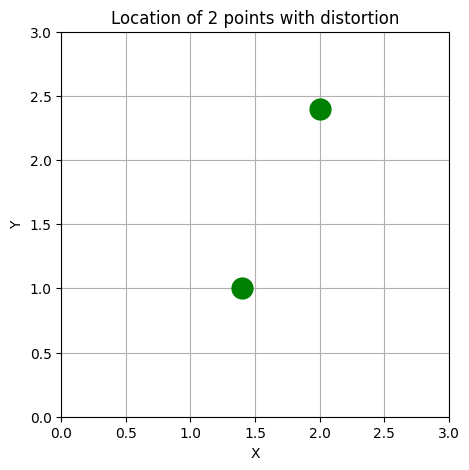

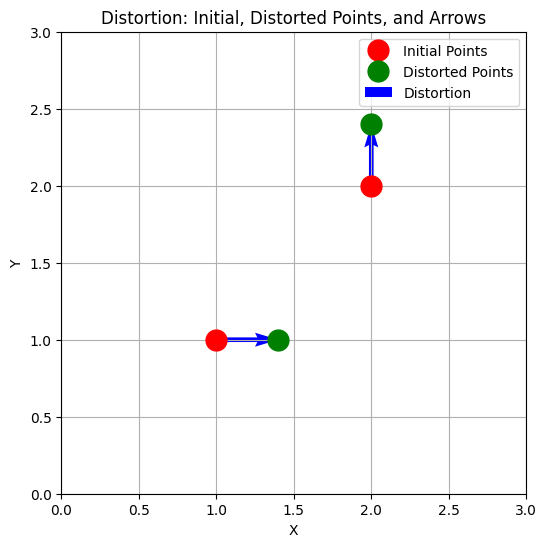

In [2]:
plt.figure(figsize=(5,5))
plt.plot([1,2], [1,2], 'ro', markersize=15)
plt.xlim(0,3)
plt.ylim(0,3)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Location of 2 points without distortion')
plt.grid(True)
plt.show()
plt.figure(figsize=(5,5))
plt.plot([1.4,2], [1,2.4], 'go', markersize=15)
plt.xlim(0,3)
plt.ylim(0,3)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Location of 2 points with distortion')
plt.grid(True)
plt.show()

x = np.array([1, 2])
y = np.array([1, 2])
dx = np.array([0.4, 0.0])  # distortion in x
dy = np.array([0.0, 0.4])  # distortion in y


# Combined plot: initial points, distorted points, and distortion arrows
x_init = np.array([1, 2])
y_init = np.array([1, 2])
x_dist = np.array([1.4, 2])
y_dist = np.array([1, 2.4])
dx = x_dist - x_init
dy = y_dist - y_init

plt.figure(figsize=(6,6))
# Initial points (red)
plt.plot(x_init, y_init, 'ro', markersize=15, label='Initial Points')
# Distorted points (green)
plt.plot(x_dist, y_dist, 'go', markersize=15, label='Distorted Points')
# Arrows showing distortion
plt.quiver(x_init, y_init, dx, dy, angles='xy', scale_units='xy', scale=1, color='b', width=0.01, label='Distortion')

plt.xlim(0,3)
plt.ylim(0,3)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Distortion: Initial, Distorted Points, and Arrows')
plt.grid(True)
plt.legend()
plt.show()


## This is a distortion map using the above example

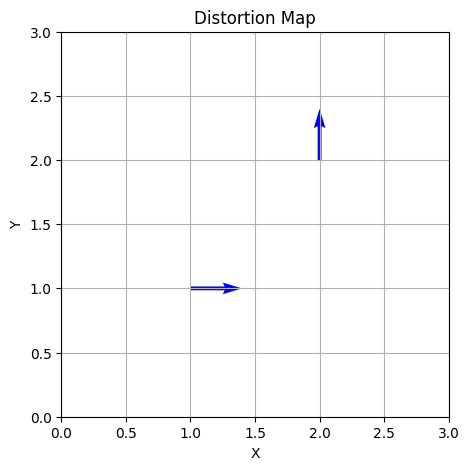

In [3]:
plt.figure(figsize=(5,5))
plt.quiver(x, y, dx, dy, angles='xy', scale_units='xy', scale=1, color='b', width=0.01)
#plt.scatter(x, y, color='k', s=100, label='Original Points')
plt.xlim(0,3)
plt.ylim(0,3)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Distortion Map')
plt.grid(True)
plt.show()

## Now let's look at a distortion field

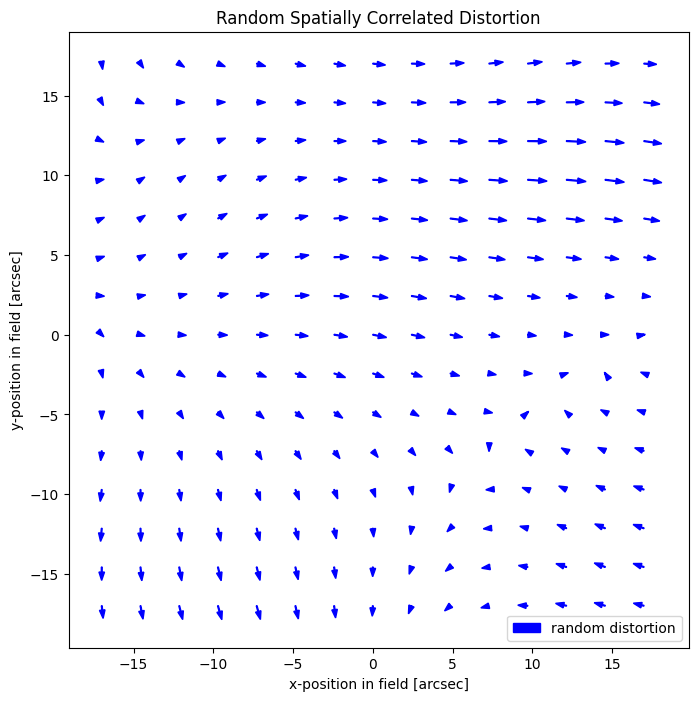

In [4]:
#Creating a distortion field using my program and hiding printed output
#from contextlib import redirect_stdout
#import io
#f = io.StringIO()
#with redirect_stdout(f):
#    dist = CreateDist(dist_samp=15,dxdy=0.1,num_shifts=10,rand_scale=8e-1,std=10,N_poly=6,centroid_noise_std=0)
#    dist._gen_dist(plot='yes')

dist = CreateDist(dist_samp=15,dxdy=0.1,num_shifts=10,rand_scale=5e-1,std=10,N_poly=6,centroid_noise_std=0)
dist_field = dist._gen_dist(plot='yes')

## A set of uniform grid-points applied over the distortion field will look like this:

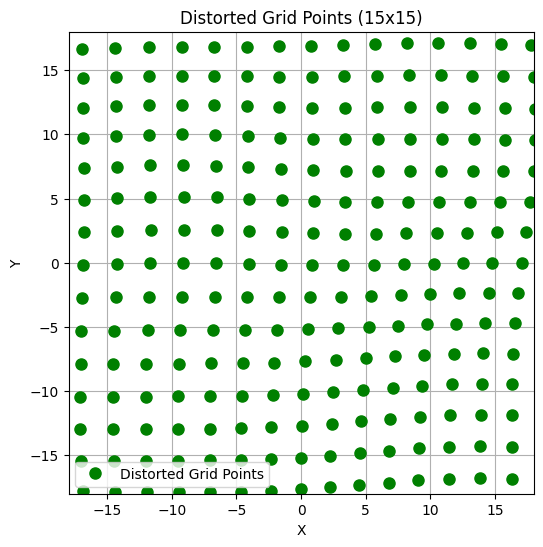

In [5]:
# dist_field is assumed to be a (N, 2) array where N = 15*15 = 225 for a 15x15 grid
x_lin = np.linspace(-17, 17, 15)
y_lin = np.linspace(-17, 17, 15)
x_mesh, y_mesh = np.meshgrid(x_lin, y_lin)
x_flat = x_mesh.flatten()
y_flat = y_mesh.flatten()
# Add the distortion field values to the grid positions
x_distorted = x_flat + dist_field[:,0]
y_distorted = y_flat + dist_field[:,1]
# Reshape to 2D grid if needed
x_distorted_grid = x_distorted.reshape(15, 15)
y_distorted_grid = y_distorted.reshape(15, 15)
# Show a sample of the results
x_distorted_grid, y_distorted_grid

# Plot the distorted grid using the previous style
plt.figure(figsize=(6,6))
plt.plot(x_distorted, y_distorted, 'go', markersize=8, label='Distorted Grid Points')
plt.xlim(-18, 18)
plt.ylim(-18, 18)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Distorted Grid Points (15x15)')
plt.grid(True)
plt.legend()
plt.show()

# Now we know what a distortion field is, let's look at a problem. What if we have an unknown distortion field and we try to figure out the distortion field?

# Solution, we need to take multiple measurements of the same grid points at different positions within the field.

### Note, the difficulties in the project lies in the fact that we do not know the exact locations of the set of grid-points. Uncertainties arise due to manufacture errors etc. and they were significant enough to impact the precision of this project.

/Users/jchung/Documents/Uni Works/Honours/Astrometric-Calibration-Work/PrototypingRead.py:130: RuntimeWarning: divide by zero encountered in scalar divide
  RotRad = np.arctan((p1[0]-p2[0])/2/np.abs((p1[1]-p2[1])/2))*sign


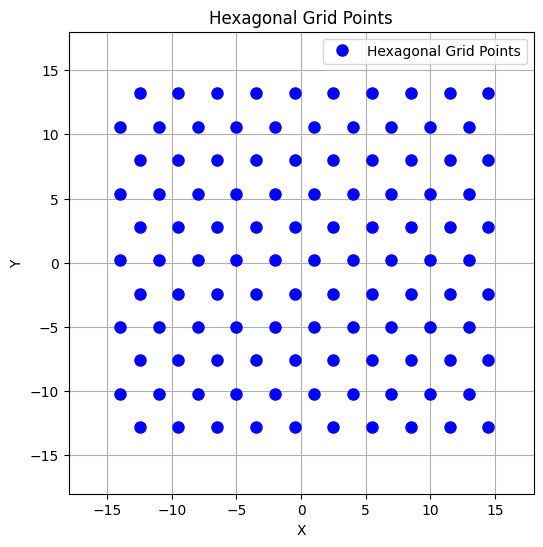

In [6]:
#Creating a hexagonal grid of points using AstrocalibRead

# Creating some null points to activate the class AstrocalibRead
data = pd.DataFrame({'home':[np.nan],'shiftx':[np.nan],'shifty':[np.nan]})
corners = pd.DataFrame({'data':[np.nan],'dimension':np.nan,'dx':np.nan,'dy':np.nan})
sim = AstrocalibRead(data,corners,'C')

# Define two points that define the hexagonal grid spacing and the limits of the grid
p1=[10,10]
p2=[13,10]
lim=[30,30] #specify the desired x and y dimension, 30 means from -15 to +15.
x,y = sim._make_hex_grid(p1,p2,lim)
x = x-15 #Centering the grid around (0,0)
y = y-15

plt.figure(figsize=(6,6))
plt.plot(x, y, 'bo', markersize=8, label='Hexagonal Grid Points')
plt.xlim(-18, 18)
plt.ylim(-18, 18)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Hexagonal Grid Points')
plt.grid(True)
plt.legend()
plt.show()

Input spatial Distortion RMS: 0.004473910057870665
Fitted Distortion RMS: 0.004172306826246686
Residual Distortionh RMS: 0.0034806803012642894
...
Reperforming DAC using the calculated polynomial coefficients as the distortion:
Input U_hat Distortion RMS: 0.004172306826246686
Fitted Distortion RMS: 0.004173001895364199
Residual Distortionh RMS: 1.217688005994642e-06
Position recovery for Home Position Residual RMS: 1.217688005994846e-06
Plotting 1...


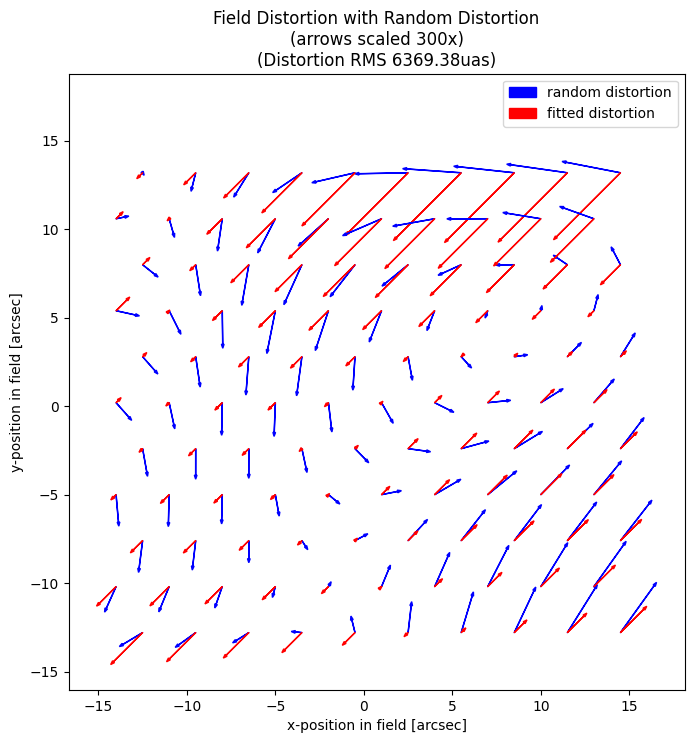

Plotting 2...


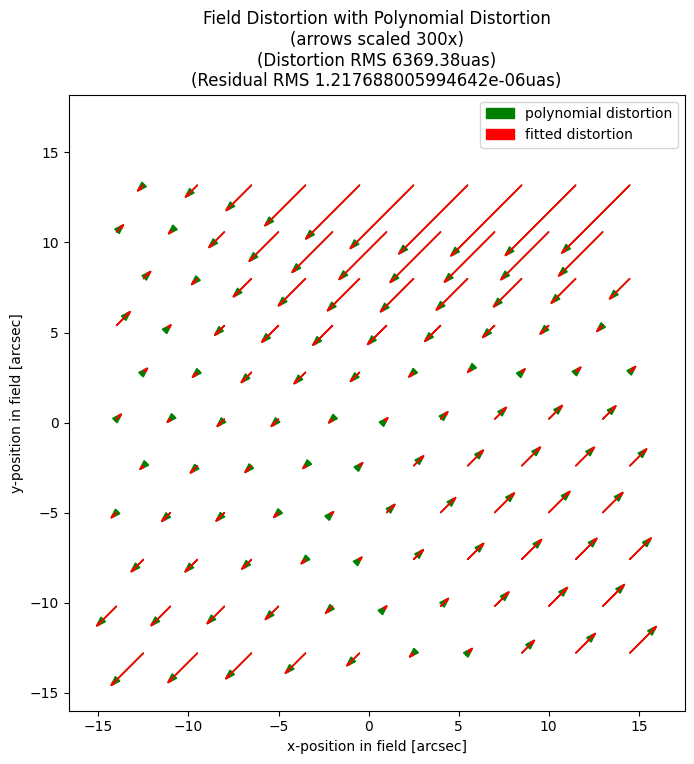

In [12]:
#Simulate the distortion on the grid points and fit the distortion using various methods
distort = CreateDist(dist_samp=31,dxdy=0.1,num_shifts=10,rand_scale=5e-3,std=10,N_poly=6,centroid_noise_std=0)
distort.do_uhat_dist(x,y,plot='yes')

## I tested different methods of distortion recovery, implementing the new technique developed by my supervisors. The main takeaway from this simulation is that the accuracy of distortion recovery is heavily reliant on the type of distortion. The recovery methods are weak against random distortions but strong against distortions that can be well defined by polynomials.

## Notes
#### Interpolation as an estimation of the distoriton field needs further work
#### Not sure how well the DAC method can fit distortion fields of different spatial frequency
#### Performing DAC on top of a distortion field generated by polynomial functions give a residual distortion with residual ~10^-9as
#### 50uas goal -> 5e-5
#### Make back up of all files
#### Upgrade everything into PrototypingSim
#### Check for the flipping of the field

## Part 2
### Note, this section requires the installation of mavism

In [5]:
# input true distortion field:
#static_distort =  ascii.read("./datav1_1/data/StaticDistortTransmissive")

# create the astrometry simulator object:
#astrom_sim = AstromCalibSimE2E(
#    static_distort,           # astropy parsed input file with appropriate headers
#    hole_position_std=10e-6,   # manufacturing tolerance in mm.
#    dx=1.0, dy=1.0,           # Shift applied to mask for differential method.
#    n_poly=6)   
#recovered_dist_xx,recovered_dist_yy = astrom_sim.recovered_dist(astrom_sim._p0_meas[:,0],astrom_sim._p0_meas[:,1])


# Evaluate astrometric error between objects
n_objects    = 1000
objects      = np.random.random([n_objects,2])*30-15
#print(objects)
filt_objects = ((objects**2).sum(axis=1)**0.5)<=5.0
#print(filt_objects)
objects      = objects[filt_objects,:]
n_objects    = objects.shape[0]
dists = []
errs  = []
for i in range(n_objects):
    for j in range(i):
        ob1 = objects[i,:]
        ob2 = objects[j,:]
        true_distance = np.linalg.norm(ob1-ob2)
        meas_distance = np.linalg.norm(ob1-ob2+astrom_sim.residual_dist(ob1[0],ob1[1])-astrom_sim.residual_dist(ob2[0],ob2[1]))
        dists.append(true_distance)
        errs.append(true_distance-meas_distance)
dists = np.r_[dists]
errs  = np.r_[errs]
plt.figure(figsize=[5,5])
plt.plot(dists,np.abs(errs)*1e6,"b.")
plt.axline(np.r_[0,0],slope=50/1,linestyle=":",color="k")
plt.axline(np.r_[0,0],slope=150/1,linestyle="-",color="k")
plt.legend(["Astrometric Error","Goal Accuracy","Req Accuracy"])
plt.xlim([0,5])
plt.ylim([0,400])
plt.title("Astrometric Error vs Distance")
plt.xlabel("Separation [arcsec]")
plt.ylabel("Astrometric Error after calibration [uas]")
plt.show()

NameError: name 'astrom_sim' is not defined

### Note: dx_meas gives different results if calculate (in comparison to original input)

## Old Codes

In [235]:

#Random distortion with spatial correlations
def gen_dist(n_points=20,std=5,dist_rms=4e-5,plot='no'):
    #n_points:  number of points in each grid dimension
    #std:  spatial covariance modelled as gaussian with std: (higher std = more spatially correlated)

    # create a grid and centre it at (0,0)
    xx,yy = np.meshgrid(np.linspace(-17, 17, n_points),np.linspace(-17, 17, n_points),indexing="xy")
    xx = xx - xx.mean()
    xx = xx.flatten()
    yy = yy - yy.mean()
    yy = yy.flatten()
    # build distance matrix from all points to all points:
    rr = ((xx[:,None]-xx[None,:])**2 + (yy[:,None]-yy[None,:])**2)**0.5
    # evaluate covariance matrix at distance matrix points:
    cov = 1/(std*(2*np.pi)**0.5)*np.exp(-0.5*rr**2/std**2)
    # factorise covariance matrix into "square root" form, so we can generate random realisations
    w,v = np.linalg.eigh(cov)
    filt = w>1e-7
    w = w[filt]
    v = v[:,filt]
    L = v @ np.diag(w**0.5)
    # generate normally distributed random input (one each for x and y):
    v = np.random.randn(L.shape[1],2)
    # map it to random variable with desired covariance:
    d = L @ v
    # plot
    if plot=='yes':
        for i in range(xx.shape[0]):
            plt.arrow(xx[i],yy[i],d[i,0],d[i,1],width=0.05,color='c')
        plt.axis("equal")
    return d*dist_rms/np.mean(np.abs(d))
#Distortion function based on the DAC coefficients
def u_hat_dist(xx,yy,uhat,n_poly): 
    def _recovered_distortions_ana(N):
        n_tot_poly = ((N+1)*(N+2))//2-1
        u_hat = uhat
        return lambda x,y: np.c_[sim._hbvpoly(np.c_[x,y],u_hat[:n_tot_poly]),
                                 sim._hbvpoly(np.c_[x,y],u_hat[n_tot_poly:])]
    out_xx = xx*0
    out_yy = xx*0
    for i in range(xx.shape[0]):
        #func_handle = self._recovered_distortions_ana(self._home_pos,self._shiftx_pos,self._shifty_pos,n_poly,self._dx_meas_x,self._dy_meas_y)
        func_handle = _recovered_distortions_ana(n_poly)
        out_xx[i],out_yy[i] = func_handle(xx[i],yy[i])[0]
    return np.c_[out_xx,out_yy]
def Create_Dist(*,nsamp=31, dist_samp=15,dxdy=0.5,num_shifts=2,rand_scale=10e-5,std=5,N_poly=6,mode='random',plot='no',int_test='no'):
    #for j in [5,10,15,20,25,30,35]:
    # Create a grid of data points
    x_rand = np.linspace(-17, 17, dist_samp)  # X-coordinates
    y_rand = np.linspace(-17, 17, dist_samp)  # Y-coordinates

    random_dist_x = gen_dist(n_points=dist_samp,std=std,dist_rms=rand_scale)[:,0].reshape(dist_samp,dist_samp)
    random_dist_y = gen_dist(n_points=dist_samp,std=std,dist_rms=rand_scale)[:,1].reshape(dist_samp,dist_samp)

    # Define the interpolation function using RectBivariateSpline
    dist_func_x = interpolate.RectBivariateSpline(x_rand, y_rand, random_dist_x,kx=1,ky=1)
    dist_func_y = interpolate.RectBivariateSpline(x_rand, y_rand, random_dist_y,kx=1,ky=1)


    

    #Generate a unit circle to determine the shifting amount
    angles = np.linspace(0, 2 * np.pi, num_shifts, endpoint=False)

    # Calculate the x and y coordinates of the points using trigonometry
    x_ang = np.cos(angles)
    y_ang = np.sin(angles)

    # Create a list of (x, y) tuples representing the points
    if num_shifts == 1:
        print('Provide a num_shifts number greater than 1')
    elif num_shifts == 2:
        circ_points = np.array([[dxdy,0],[0,dxdy]])
    else:
        circ_points = np.array([(x_ang[i], y_ang[i]) for i in range(num_shifts)]) * dxdy
    ###############
    ###############
    ###############
    ###############

    #Create new coordinates
    # Values to evaluate distortion functions with. Can be any arangement of 
    # coordinates within the science field.


    x_linspace = np.linspace(-17,17,nsamp)
    y_linspace = np.linspace(-17,17,nsamp)
    x_mesh,y_mesh = np.meshgrid(x_linspace,y_linspace)
    x_flattened = x_mesh.flatten()
    y_flattened = y_mesh.flatten()



    #Home Distortions
    spatial_dist_h = np.c_[(dist_func_x(y_flattened,x_flattened,grid=False)), 
                           (dist_func_y(y_flattened,x_flattened,grid=False))] #Need to reverse x and y due to the nature of the interpolation function
    mavis_dist_xx_h,mavis_dist_yy_h = astrom_sim.input_dist(x_flattened,y_flattened)
    mavis_dist_h = np.c_[mavis_dist_xx_h,mavis_dist_yy_h]

    #Shifted Distortions
    shifted_dist = np.zeros([len(circ_points),np.shape(spatial_dist_h)[0],np.shape(spatial_dist_h)[1]])
    mavis_shifted_dist = np.zeros([len(circ_points),np.shape(mavis_dist_h)[0],np.shape(mavis_dist_h)[1]])

    for i in range(len(circ_points)):
        x_points = x_flattened + circ_points[i][0]
        y_points = y_flattened + circ_points[i][1]
        shifted_dist[i] = np.c_[(dist_func_x(y_points,x_points,grid=False)),
                                (dist_func_y(y_points,x_points,grid=False))]
        
        xx_points = x_flattened + circ_points[i][0]
        yy_points = y_flattened + circ_points[i][1]
        mavis_dist_xx,mavis_dist_yy = astrom_sim.input_dist(xx_points,yy_points)
        mavis_shifted_dist[i] = np.c_[mavis_dist_xx,mavis_dist_yy]

    

    if mode=='MAVIS':
        home_dist = mavis_dist_h
        home_meas = np.c_[x_flattened,y_flattened] + home_dist
        shiftxy_meas = mavis_shifted_dist + np.c_[x_flattened,y_flattened] + circ_points[:,None]
        print('Input MAVIS Distortion RMS:', np.mean(np.abs(home_dist)))
    elif mode=='spatial':
        home_dist = spatial_dist_h
        home_meas = np.c_[x_flattened,y_flattened] + home_dist
        shiftxy_meas = shifted_dist + np.c_[x_flattened,y_flattened] + circ_points[:,None]
        print('Input spatial Distortion RMS:', np.mean(np.abs(home_dist)))
    elif mode == 'hybrid':
        home_dist = mavis_dist_h + spatial_dist_h
        home_meas = np.c_[x_flattened,y_flattened] + home_dist 
        shiftxy_meas = mavis_shifted_dist + shifted_dist + np.c_[x_flattened,y_flattened] + circ_points[:,None]
        print('Input MAVIS Distortion RMS:', np.mean(np.abs(mavis_dist_h)))
        print('Input spatial Distortion RMS:', np.mean(np.abs(spatial_dist_h)))
        print('Input total Distortion RMS:', np.mean(np.abs(home_dist)))
    else:
        print('Enter mode="MAVIS", mode="spatial", or mode="hybrid"')
        
        
    #Perform DAC
    home1_distx, home1_disty = sim.recovered_dist_manual(x_flattened,y_flattened,home_meas,shiftxy=shiftxy_meas,dxy_meas=circ_points,n_poly=N_poly,r=30)
    
    print('Fitted Distortion RMS:',np.mean(np.abs( np.c_[home1_distx,home1_disty])))
    print('Residual Distortionh RMS:',np.mean(np.abs(home_dist - np.c_[home1_distx,home1_disty])))

    ######################
    ######################
    ######################


    print('...')
    print('Reperforming DAC using the calculated polynomial coefficients as the distortion:')

    u_hat_dist_h = u_hat_dist(x_flattened,y_flattened,sim._u_hat,N_poly)
    u_hat_dist_shifted = np.zeros([len(circ_points),u_hat_dist_h.shape[0],u_hat_dist_h.shape[1]])
    for j in range(len(circ_points)):
        xx_points = x_flattened + circ_points[j][0]
        yy_points = y_flattened + circ_points[j][1]
        u_hat_dist_shifted[j] = u_hat_dist(xx_points,yy_points,sim._u_hat,N_poly)
    
    
    uhat_home_meas = np.c_[x_flattened,y_flattened] + u_hat_dist_h
    uhat_shiftxy_meas = u_hat_dist_shifted + np.c_[x_flattened,y_flattened] + circ_points[:,None]
    print('Input U_hat Distortion RMS:', np.mean(np.abs(u_hat_dist_h)))


     #Perform DAC
    uhat_home_distx, uhat_home_disty = sim.recovered_dist_manual(x_flattened,y_flattened,uhat_home_meas,shiftxy=uhat_shiftxy_meas,dxy_meas=circ_points,n_poly=N_poly,r=30)
    
    
    print('Fitted Distortion RMS:',np.mean(np.abs( np.c_[uhat_home_distx,uhat_home_disty])))
    print('Residual Distortionh RMS:',np.mean(np.abs(np.c_[uhat_home_distx,uhat_home_disty] - np.c_[home1_distx,home1_disty])))
    
    pos_res = uhat_home_meas - np.c_[uhat_home_distx, uhat_home_disty] - np.c_[x_flattened, y_flattened]
    print('Position recovery for Home Position Residual RMS:',np.mean(np.abs(pos_res)))


    ######################
    ######################
    ######################
    if int_test == 'yes':

        print('...')
        print('Reperforming DAC using the calculated polynomial coefficients as the distortion but with the interpolation method:')


        x_uhat_mesh, y_uhat_mesh = np.meshgrid(x_rand,y_rand)
        x_uhat_mesh_flattened = x_uhat_mesh.flatten()
        y_uhat_mesh_flattened = y_uhat_mesh.flatten()


        u_hat_interp_dist_gen = u_hat_dist(x_uhat_mesh_flattened,y_uhat_mesh_flattened,sim._u_hat,N_poly)
        u_hat_dist_gen_xreshape = u_hat_interp_dist_gen[:,0].reshape(dist_samp,dist_samp)
        u_hat_dist_gen_yreshape = u_hat_interp_dist_gen[:,1].reshape(dist_samp,dist_samp)


        # Define the interpolation function using RectBivariateSpline
        uhat_dist_func_x = interpolate.RectBivariateSpline(x_rand, y_rand, u_hat_dist_gen_xreshape,kx=1,ky=1)
        uhat_dist_func_y = interpolate.RectBivariateSpline(x_rand, y_rand, u_hat_dist_gen_yreshape,kx=1,ky=1)



        #Home Distortion
        #uhat_interp_dist_h = np.c_[(uhat_dist_func_x(x_linspace,y_linspace)).flatten(), 
        #                        (uhat_dist_func_y(x_linspace,y_linspace)).flatten()]
        uhat_interp_dist_h = np.c_[uhat_dist_func_x(y_flattened,x_flattened,grid=False), 
                                   uhat_dist_func_y(y_flattened,x_flattened,grid=False)]
        #Shifted Distortions
        uhat_interp_shifted_dist = np.zeros([len(circ_points),np.shape(uhat_interp_dist_h)[0],np.shape(uhat_interp_dist_h)[1]])

        
        for k in range(len(circ_points)):
            #x_points = x_linspace + circ_points[k][0]
            #y_points = y_linspace + circ_points[k][1]
            x_points = x_flattened + circ_points[k][0]
            y_points = y_flattened + circ_points[k][1]
            uhat_interp_shifted_dist[k] = np.c_[uhat_dist_func_x(y_points,x_points,grid=False),
                                                uhat_dist_func_y(y_points,x_points,grid=False)]
        
        
        uhat_interp_home_meas = np.c_[x_flattened,y_flattened] + uhat_interp_dist_h
        uhat_interp_shiftxy_meas = uhat_interp_shifted_dist + np.c_[x_flattened,y_flattened] + circ_points[:,None]
        print('Input U_hat Interpolated Distortion RMS:', np.mean(np.abs(uhat_interp_dist_h)))

        #Perform DAC
        uhat_interp_home_distx, uhat_interp_home_disty = sim.recovered_dist_manual(x_flattened,y_flattened,uhat_interp_home_meas,shiftxy=uhat_interp_shiftxy_meas,dxy_meas=circ_points,n_poly=N_poly,r=30)
        
        
        print('Fitted Distortion RMS:',np.mean(np.abs( np.c_[uhat_interp_home_distx,uhat_interp_home_disty])))
        print('Residual Distortionh RMS:',np.mean(np.abs(np.c_[uhat_interp_home_distx,uhat_interp_home_disty] -uhat_interp_dist_h)))

        pos_res2 = uhat_interp_home_meas - np.c_[uhat_interp_home_distx, uhat_interp_home_disty] - np.c_[x_flattened, y_flattened]
        print('Position recovery for Home Position Residual RMS:',np.mean(np.abs(pos_res2)))


    ######################   
    ######################
    ###################### 


    if plot=='yes':
        # plot residual
        plt.figure(figsize=[8,8])
        arrow_sf = 100
        Distortion_scale = np.sqrt(np.mean(home1_distx**2+home1_disty**2))*1000
        for i in range(x_flattened.shape[0]):
            plt.arrow(x_flattened[i],y_flattened[i],arrow_sf*uhat_interp_dist_h[:,0][i],arrow_sf*uhat_interp_dist_h[:,1][i],
                      color="r",head_width=0.05,width=0.01,length_includes_head=True)   
        for j in range(x_flattened.shape[0]):    
            #plt.arrow(x_flattened[i],y_flattened[i],arrow_sf*home_dist[:,0][i],arrow_sf*home_dist[:,1][i],
            #        color="r",head_width=0.05,width=0.01,length_includes_head=True)
            #plt.arrow(x_flattened[i],y_flattened[i],arrow_sf*home1_distx[i],arrow_sf*home1_disty[i],
                    #color="b",head_width=0.05,width=0.01,length_includes_head=True)
            #plt.arrow(x_flattened[i],y_flattened[i],arrow_sf*uhat_home_distx[i],arrow_sf*uhat_home_disty[i],
                    #color="g",head_width=0.05,width=0.01,length_includes_head=True)
            #plt.arrow(x_flattened[i],y_flattened[i],arrow_sf*uhat_interp_home_distx[i],arrow_sf*uhat_interp_home_disty[i],
            #        color="y",head_width=0.05,width=0.01,length_includes_head=True)
            plt.arrow(x_flattened[j],y_flattened[j],arrow_sf*u_hat_interp_dist_gen[:,0][j],arrow_sf*u_hat_interp_dist_gen[:,1][j],
                      color="b",head_width=0.05,width=0.01,length_includes_head=True)
                     
            plt.axis("square")
        plt.legend(["true distortion","interpolated distortion"])
        plt.title(f"Field Distortion\n(arrows scaled {arrow_sf:0.0f}x)\n(Distortion RMS {Distortion_scale*1000:0.02f}uas)")
        plt.xlabel("x-position in field [arcsec]")
        plt.ylabel("y-position in field [arcsec]")
        plt.show()

        
    return u_hat_interp_dist_gen, uhat_interp_dist_h, x_rand, y_rand, x_flattened, y_flattened

In [236]:
u_hat_interp_dist_gen, uhat_interp_dist_h = Create_Dist(nsamp=21,dist_samp=21,dxdy=1,std=5,num_shifts=10,rand_scale=4e-3,N_poly=6,mode='spatial',int_test='yes',plot='no')
#home_meas2, home_distx2, home_disty2, x_flattened, y_flattened = Create_Dist(nsamp=16,dist_samp=5,dxdy=0.1,std=5,num_shifts=10,rand_scale=4e-5,N_poly=6,mode='spatial',plot='no')
#home_meas3, home_distx3, home_disty3, x_flattened, y_flattened = Create_Dist(nsamp=16,dist_samp=5,dxdy=0.1,std=5,num_shifts=10,rand_scale=4e-5,N_poly=6,mode='spatial',plot='no')


Input spatial Distortion RMS: 0.0038118337029891835
Fitted Distortion RMS: 0.004199406454509754
Residual Distortionh RMS: 0.003958895790647802
...
Reperforming DAC using the calculated polynomial coefficients as the distortion:
Input U_hat Distortion RMS: 0.004199406454509754
Fitted Distortion RMS: 0.004173754550195733
Residual Distortionh RMS: 3.4152678805777254e-05
Position recovery for Home Position Residual RMS: 3.415267880579023e-05
...
Reperforming DAC using the calculated polynomial coefficients as the distortion but with the interpolation method:
Input U_hat Interpolated Distortion RMS: 0.004173754550195733
Fitted Distortion RMS: 0.00401375060413342
Residual Distortionh RMS: 0.00032765256767838124
Position recovery for Home Position Residual RMS: 0.00032765256767842244


ValueError: too many values to unpack (expected 2)

In [242]:
x_rand = np.linspace(-5,5,4)
y_rand = np.linspace(-5,5,4)
x_uhat_mesh, y_uhat_mesh = np.meshgrid(x_rand,y_rand)
x_uhat_mesh_flattened = x_uhat_mesh.flatten()
y_uhat_mesh_flattened = y_uhat_mesh.flatten()


u_hat_interp_dist_gen = np.array([[1,2],[1,2],[1,2],[1,2],
                                  [1,2],[1,2],[1,2],[1,2],
                                  [1,2],[1,2],[1,2],[1,2],
                                  [1,2],[1,2],[1,2],[1,2]])
u_hat_interp_dist_gen = np.random.rand(16,2)
u_hat_dist_gen_xreshape = u_hat_interp_dist_gen[:,0].reshape(4,4)
u_hat_dist_gen_yreshape = u_hat_interp_dist_gen[:,1].reshape(4,4)


# Define the interpolation function using RectBivariateSpline
uhat_dist_func_x = interpolate.RectBivariateSpline(y_rand, x_rand, u_hat_dist_gen_xreshape,kx=1,ky=1)
uhat_dist_func_y = interpolate.RectBivariateSpline(y_rand, x_rand, u_hat_dist_gen_yreshape,kx=1,ky=1)



#Home Distortion
#uhat_interp_dist_h = np.c_[(uhat_dist_func_x(x_linspace,y_linspace)).flatten(), 
#                        (uhat_dist_func_y(x_linspace,y_linspace)).flatten()]
uhat_interp_dist_h = np.c_[uhat_dist_func_x(x_uhat_mesh_flattened,y_uhat_mesh_flattened,grid=False), 
                           uhat_dist_func_y(x_uhat_mesh_flattened,y_uhat_mesh_flattened,grid=False)]

print(u_hat_interp_dist_gen)
print(uhat_interp_dist_h)

[[0.4184168  0.57375471]
 [0.93795491 0.34237665]
 [0.70087536 0.88082156]
 [0.27051618 0.49392538]
 [0.79885847 0.50628958]
 [0.05128816 0.29412668]
 [0.63192474 0.31472519]
 [0.0421091  0.30545645]
 [0.95087565 0.60656645]
 [0.04802349 0.04010822]
 [0.31246854 0.75233199]
 [0.60321216 0.97469612]
 [0.52695232 0.50116503]
 [0.48278872 0.25451743]
 [0.26393093 0.24950847]
 [0.45265016 0.47345885]]
[[0.4184168  0.57375471]
 [0.79885847 0.50628958]
 [0.95087565 0.60656645]
 [0.52695232 0.50116503]
 [0.93795491 0.34237665]
 [0.05128816 0.29412668]
 [0.04802349 0.04010822]
 [0.48278872 0.25451743]
 [0.70087536 0.88082156]
 [0.63192474 0.31472519]
 [0.31246854 0.75233199]
 [0.26393093 0.24950847]
 [0.27051618 0.49392538]
 [0.0421091  0.30545645]
 [0.60321216 0.97469612]
 [0.45265016 0.47345885]]


0 | 4.516e-03
1 | 4.556e-03
2 | 4.554e-03
3 | 4.479e-03
4 | 4.341e-03
5 | 4.199e-03
6 | 4.108e-03
7 | 4.137e-03
8 | 4.258e-03
9 | 4.400e-03


(-17.599118051927732,
 17.625414628884187,
 -17.612001050302162,
 17.612531630509757)

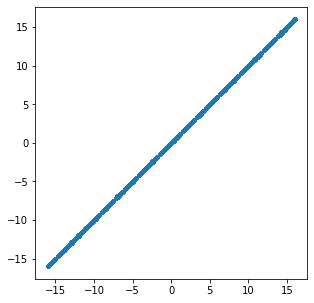

In [170]:
#print(u_hat_dist_h, uhat_interp_dist_h)
i=0
for i in range(10):
    print(f"{i:d} | {np.std(u_hat_dist_shifted[i].flatten()-uhat_interp_shifted_dist[i].flatten()):0.3e}")
plt.figure(figsize=[5,5])
#plt.plot(u_hat_dist_h.flatten(),uhat_interp_dist_h.flatten(),".")
#plt.plot(u_hat_dist_shifted[:].flatten(),uhat_interp_shifted_dist[:].flatten(),".")
plt.plot(uhat_shiftxy_meas[:].flatten(),uhat_interp_shiftxy_meas[:].flatten(),".")
plt.axis("square")
#plt.axline([0,0],[0.2,0.2])
#plt.xlim([-0.01,0.02])
#plt.ylim([-0.01,0.02])


In [171]:
np.allclose(uhat_shiftxy_meas,uhat_interp_shiftxy_meas)

False